In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix

In [ ]:
# suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
def chng(x):
    if x==-1:
        return 0
    return x

In [ ]:
class QDA:
    
    def __init__(self):
        self.x=None
        self.y=None
        self.cov_mat = None
        self.weights = None
        self.bias = None
        
    def qda(self,x,cov,mean,class_prob):
        x = np.array(x)
        cov= np.linalg.inv(cov)
        delta = -0.5*np.linalg.multi_dot([x.T,cov,x]) 
        delta += np.linalg.multi_dot([mean.T,cov,x]) 
        delta -= 0.5*np.linalg.multi_dot([mean.T,cov,mean]) + np.log(class_prob**2)+0.5*np.log(np.linalg.det(cov))
        return delta
    
    def fit(self,x,y):
        self.x = x
        self.y = y
        r = x.shape[0]
        l = list(y.unique())
        self.cls = l
        x["target"] = y
        d0 = np.array(x[x["target"]==l[0]].drop("target",axis=1))
        d1 = np.array(x[x["target"]==l[1]].drop("target",axis=1))
        
        p_0 = len(d0)/r
        self.p_0 = p_0
        p_1 = 1-p_0
        self.p_1 = p_1
        mean1 = d1.mean(0)
        mean0 = d0.mean(0)
        self.mean0 = mean0
        self.mean1 = mean1
        a = np.cov(d0.T)
        b = np.cov(d1.T)
        self.cov_0 = a
        self.cov_1 = b
    ## ax^2 +bx +c =0 Decission Boundary
        inv_0 = np.linalg.inv(a)
        inv_1 = np.linalg.inv(b)
        self.a = -0.5*(inv_1-inv_0)
        self.b = np.dot(mean1.T,inv_1) -np.dot(mean0.T,inv_0)
        k = (np.linalg.det(a)/np.linalg.det(b))**(0.5)
        k = k * (p_1/p_0)**2
        self.c = -0.5* (np.linalg.multi_dot([mean1.T,inv_1,mean1])-np.linalg.multi_dot([mean0.T,inv_0,mean0])) + np.log(k)        
        
    def predict(self,x):
        y = [ ]
        x = np.array(x)
        for data in x:
            g0 = self.qda(data,self.cov_0,self.mean0,self.p_0)
            g1 = self.qda(data,self.cov_1,self.mean1,self.p_1)
            y.append(self.cls[np.argmax([g0,g1])])
        return y
    
    def s_predict(self,*args):
        data = np.array(args)
        g0 = self.qda(data,self.cov_0,self.mean0,self.p_0)
        g1 = self.qda(data,self.cov_1,self.mean1,self.p_1)
        return self.cls[np.argmax([g0,g1])]
        
    
    def predict_prob(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self._sigmoid(linear_model)
        return y_predicted

    def _sigmoid(self,x):
        return 1 / (1 + np.exp(-x))
    
    def score(self,x_test,y_test):
        y_p = self.predict(x_test)
        y_test = np.array(y_test)
        a = sum([1 for i in range(len(y_p)) if y_p[i]==y_test[i]])
        return a/len(y_test)
    
    def confusion_mat(self,x_test,y_test):
        y_pred = self.predict(x_test)
        self.cm = confusion_matrix(y_test,y_pred)
        return self.cm      
    
    def performance(self,x_test,y_test):
        cm = self.confusion_mat(x_test,y_test)
        tn = cm[0][0]
        fp = cm[0][1]
        fn = cm[1][0]
        tp = cm[1][1]
        sn = tp/(tp+fn)
        sp = tn/(tn+fp)
        pr = tp/(tp+fp)
        fm = 2*(pr*sn)/(pr+sn)
        print(f"Sensitivity is {sn}")
        print(f"Specificity is {sp}")
        print(f"Precission is {pr}")
        print(f"F_measur is {fm}")
        
    def draw_roc(self,x_test,y_test):
        tpr,fpr,threshold = roc_curve(y_test , self.predict(x_test),drop_intermediate=False)
        plt.plot(tpr,fpr,color='red',lw=5)
        plt.show()

In [ ]:
model = QDA()

In [ ]:
from google.colab import files
uploaded = files.upload()
df1= pd.read_csv('data1.csv', header= None)


Saving data1.csv to data1 (3).csv


In [ ]:
df1.head()

,0,1,2
0,14,42,1
1,29,40,1
2,22,22,1
3,11,20,1
4,10,35,1


In [ ]:
df1.shape

(200, 3)

In [ ]:
df1[2].unique()

array([ 1, -1])

In [ ]:
df1[2] = df1[2].apply(lambda x:chng(x))
df1[2].unique()

array([1, 0])

In [ ]:
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(df1[[0,1]],df1[2],test_size=0.3)

In [ ]:
model.fit(X_train1, Y_train1)

In [ ]:
print(model.a,model.b,model.c)

[[ 0.00242098 -0.00227238]
 [-0.00227238  0.00097234]] [ 0.0334518  -0.07922184] 1.5495890579319274


In [ ]:
y_predicted = model.predict(X_test1)

In [ ]:
from sklearn.metrics import classification_report 
print(classification_report(Y_test1,y_predicted))

              precision    recall  f1-score   support

           0       0.72      0.97      0.83        30
           1       0.95      0.63      0.76        30

    accuracy                           0.80        60
   macro avg       0.84      0.80      0.79        60
weighted avg       0.84      0.80      0.79        60



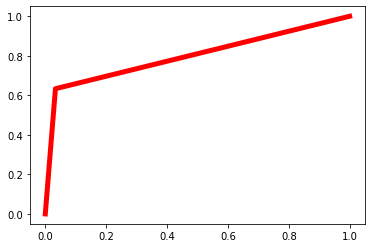

In [ ]:
model.draw_roc(X_test1,Y_test1)

In [ ]:
model.score(X_test1,Y_test1)

0.8

In [ ]:
uploaded = files.upload()

Saving data4.csv to data4.csv


In [ ]:
df4= pd.read_csv('data4.csv', header= None)
df4.head()

,0,1,2,3
0,1,1,2,1
1,1,1,5,1
2,1,1,6,1
3,1,2,1,-1
4,1,2,5,1


In [ ]:
df4.shape

(171, 4)

In [ ]:
df4[3].unique()

array([ 1, -1])

In [ ]:
df4[3] = df4[3].apply(lambda x:chng(x))
df4[3].unique()

array([1, 0])

In [ ]:
X_train4, X_test4, Y_train4, Y_test4 = train_test_split(df4[[0,1,2]],df4[3],test_size=0.3)

In [ ]:
model4 = QDA()

In [ ]:
model4.fit(X_train4, Y_train4)

In [ ]:
# model4.score(X_train4, Y_train4)

In [ ]:
y_predicted4 = model4.predict(X_test4)

In [ ]:
print(classification_report(Y_test4,y_predicted4))

              precision    recall  f1-score   support

           0       1.00      0.83      0.91        18
           1       0.92      1.00      0.96        34

    accuracy                           0.94        52
   macro avg       0.96      0.92      0.93        52
weighted avg       0.95      0.94      0.94        52



In [ ]:
uploaded = files.upload()

Saving data5.csv to data5.csv


In [ ]:
df5= pd.read_csv('data5.csv', header= None)
df5.head()

,0,1,2,3
0,-49.841,14.4510,-42.9420,-1
1,-48.796,-45.8040,9.9935,1
2,-48.563,-22.6430,-32.5720,-1
3,-48.427,37.3230,-29.4660,-1
4,-48.310,3.5721,34.9960,-1


In [ ]:
df5.shape

(218, 4)

In [ ]:
df5[3].unique()

array([-1,  1])

In [ ]:
df5[3] = df5[3].apply(lambda x:chng(x))
df5[3].unique()

array([0, 1])

In [ ]:
X_train5, X_test5, Y_train5, Y_test5 = train_test_split(df5[[0,1,2]],df5[3],test_size=0.3)

In [ ]:
model5 = QDA()

In [ ]:
model5.fit(X_train5, Y_train5)

In [ ]:
# model5.score(X_train5, Y_train5)

In [ ]:
y_predicted5 = model5.predict(X_test5)

In [ ]:
print(classification_report(Y_test5,y_predicted5))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93        28
           1       1.00      0.89      0.94        38

    accuracy                           0.94        66
   macro avg       0.94      0.95      0.94        66
weighted avg       0.95      0.94      0.94        66

